## I. Classification

### Load dataset

In [8]:
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

### Display a random number to verify the dataset

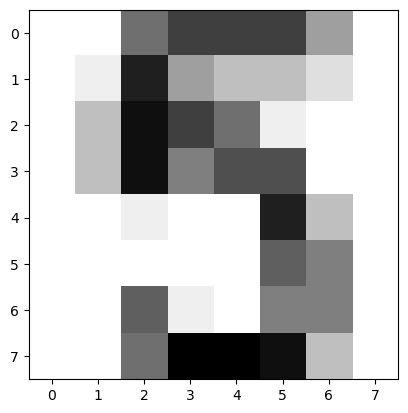

In [ ]:
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r,\
           interpolation='nearest')
plt.show()

### Split the dataset into training and testing parts

In [ ]:
from sklearn.model_selection import train_test_split
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

### Build KNN classifier 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

print("Accuracy: {0}".format(knn.score(X_test, y_test)))

Accuracy: 0.9861111111111112


### Varying number of neighbors

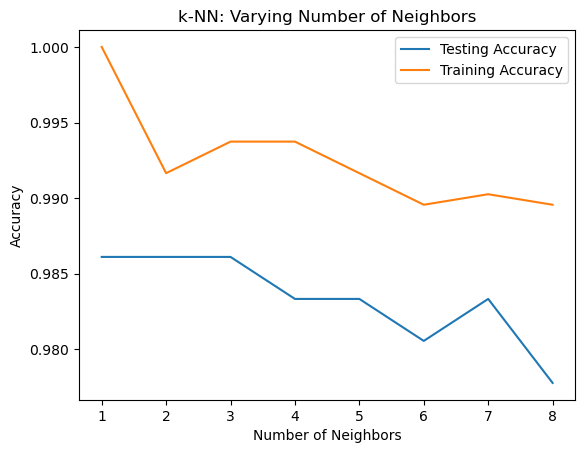

In [ ]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### Classification with deep learning

In [ ]:
!pip install torch

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [ ]:
!pip install torchvision

In [ ]:
from torchvision import datasets, transforms
mnist = datasets.MNIST(root = '.', train = True,\
                       download = True)

In [ ]:
print("Number of training examples", mnist.train_data.shape)
print("Image information", mnist[0])

Number of training examples torch.Size([60000, 28, 28])
Image information (<PIL.Image.Image image mode=L size=28x28 at 0x7FC151BB1520>, 5)


/Users/_xiaolan_ren/opt/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


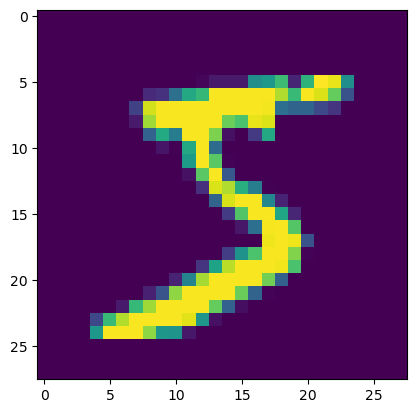

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mnist[0][0])

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fully = nn.Sequential(
            nn.Linear(28*28, 10)
        )
        
    def forward(self, x):
        x = x.view([-1, 28*28])
        x = self.fully(x)
        x = F.log_softmax(x, dim = 1)
        return x

In [ ]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root = '.', train = True, transform = transforms.Compose([transforms.ToTensor()])),\
                                           batch_size=64, shuffle = True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST(root = '.', train = False, transform = transforms.Compose([transforms.ToTensor()])),\
                                          batch_size=1, shuffle = True)

In [ ]:
def train():
    learning_rate = 1e-3
    num_epochs = 3
    
    net = Net()
    optimizer = torch.optim.Adam(net.parameters(), lr = learning_rate)
    
    for epoch in range(num_epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            output = net(data)
            
            loss = F.nll_loss(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if batch_idx % 100 == 0:
                print('Epoch = %f. Batch = %s. Loss = %s' % (epoch, batch_idx, loss.item()))
                
    return net

In [ ]:
net = train()

Epoch = 0.000000. Batch = 0. Loss = 2.3277065753936768
Epoch = 0.000000. Batch = 100. Loss = 0.9087969064712524
Epoch = 0.000000. Batch = 200. Loss = 0.713323175907135
Epoch = 0.000000. Batch = 300. Loss = 0.5581029653549194
Epoch = 0.000000. Batch = 400. Loss = 0.4567543566226959
Epoch = 0.000000. Batch = 500. Loss = 0.3967808783054352
Epoch = 0.000000. Batch = 600. Loss = 0.3883187770843506
Epoch = 0.000000. Batch = 700. Loss = 0.28547927737236023
Epoch = 0.000000. Batch = 800. Loss = 0.23505358397960663
Epoch = 0.000000. Batch = 900. Loss = 0.401700884103775
Epoch = 1.000000. Batch = 0. Loss = 0.21694329380989075
Epoch = 1.000000. Batch = 100. Loss = 0.39301466941833496
Epoch = 1.000000. Batch = 200. Loss = 0.23212866485118866
Epoch = 1.000000. Batch = 300. Loss = 0.3065193295478821
Epoch = 1.000000. Batch = 400. Loss = 0.39576101303100586
Epoch = 1.000000. Batch = 500. Loss = 0.1239086240530014
Epoch = 1.000000. Batch = 600. Loss = 0.22547277808189392
Epoch = 1.000000. Batch = 700.

In [ ]:
net.eval()
test_loss = 0
correct = 0
total = 0

for data, target in test_loader:
    total += len(target)
    output = net(data)
    pred = output.max(1, keepdim = True)[1]
    correct += target.eq(pred.view_as(target)).sum()
    
print("Correct out of %s" % total, correct.item())
print("Percentage accuracy", correct.item()*100/10000.)

Correct out of 10000 9230
Percentage accuracy 92.3


## II. Linear Regression

### Load the dataset

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('gapminder.csv')

### Use seaborn to visualize the data

<ipython-input-4-3cf57014a7aa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), square = True, cmap = 'RdYlGn')


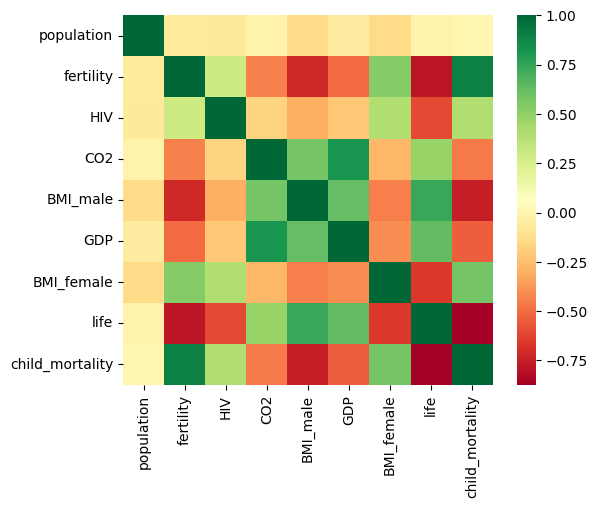

In [4]:
ax = sns.heatmap(df.corr(), square = True, cmap = 'RdYlGn')
plt.show()

### Apply linear regression with the 'fertility' feature to predict life expectancy

0.6162438752151917


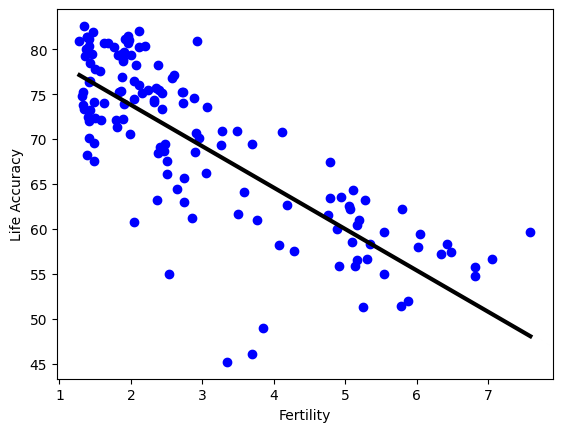

In [5]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_fertility = df['fertility'].values.reshape(-1,1)
y_life = df['life'].values.reshape(-1,1)
prediction_space = np.linspace(min(x_fertility), max(x_fertility)).reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x_fertility, y_life, test_size = 0.3, random_state = 42)

# Create the regression model: reg_all
reg = LinearRegression()

# Fit the regression to the training data
reg.fit(x_train, y_train)
y_predict = reg.predict(prediction_space)

# Print accuracy
print(reg.score(x_fertility, y_life))

plt.scatter(x_fertility, y_life, color = 'blue')
plt.plot(prediction_space, y_predict, color = 'black', linewidth = 3)
plt.ylabel('Life Accuracy')
plt.xlabel('Fertility')
plt.show()

### Apply linear regression with the all features to predict life expecntancy. 

In [6]:
features = pd.read_csv('gapminder.csv')
df = pd.read_csv('gapminder.csv')
del features['life']
del features['Region']

y_life = df['life'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(features, y_life,\
                                   test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(x_train, y_train)

print(reg_all.score(features, y_life))

0.8914651485793176


### Linear Regression using Pytorch

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

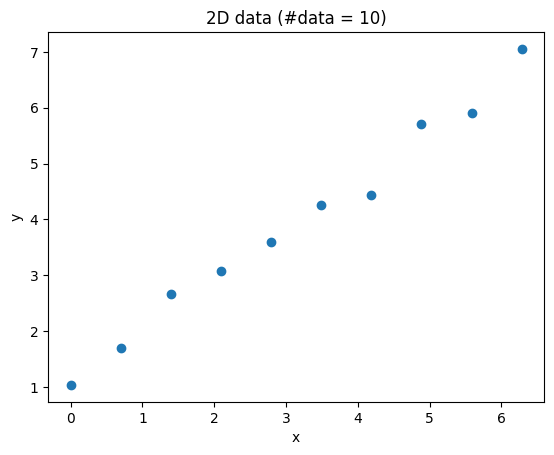

In [10]:
N = 10 # number of data points
m = .9
c = 1
x = np.linspace(0,2*np.pi,N)
y = m*x + c + np.random.normal(0,.3,x.shape)
plt.figure()
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

In [11]:
import torch

### Dataset

In [12]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        sample = {
            'feature' : torch.tensor([1,self.x[idx]]),
            'label' : torch.tensor([self.y[idx]])}
        return sample

In [13]:
dataset = MyDataset(x, y)
for i in range(len(dataset)):
    sample = dataset[i]
    print(i, sample['feature'], sample['label'])

0 tensor([1., 0.], dtype=torch.float64) tensor([1.0365], dtype=torch.float64)
1 tensor([1.0000, 0.6981], dtype=torch.float64) tensor([1.7015], dtype=torch.float64)
2 tensor([1.0000, 1.3963], dtype=torch.float64) tensor([2.6602], dtype=torch.float64)
3 tensor([1.0000, 2.0944], dtype=torch.float64) tensor([3.0703], dtype=torch.float64)
4 tensor([1.0000, 2.7925], dtype=torch.float64) tensor([3.5888], dtype=torch.float64)
5 tensor([1.0000, 3.4907], dtype=torch.float64) tensor([4.2555], dtype=torch.float64)
6 tensor([1.0000, 4.1888], dtype=torch.float64) tensor([4.4432], dtype=torch.float64)
7 tensor([1.0000, 4.8869], dtype=torch.float64) tensor([5.7136], dtype=torch.float64)
8 tensor([1.0000, 5.5851], dtype=torch.float64) tensor([5.9002], dtype=torch.float64)
9 tensor([1.0000, 6.2832], dtype=torch.float64) tensor([7.0533], dtype=torch.float64)


### Dataloader

In [14]:
from torch.utils.data import DataLoader

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
dataloader = DataLoader(dataset, batch_size=batch_size,\
                        shuffle=shuffle, num_workers=num_workers)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [15]:
import pprint as pp
for i_batch, samples in enumerate(dataloader):
    print('\nbatch# = %s' % i_batch)
    print('samples: ')
    pp.pprint(samples)


batch# = 0
samples: 
{'feature': tensor([[1.0000, 6.2832],
        [1.0000, 0.6981],
        [1.0000, 0.0000],
        [1.0000, 1.3963]], dtype=torch.float64),
 'label': tensor([[7.0533],
        [1.7015],
        [1.0365],
        [2.6602]], dtype=torch.float64)}

batch# = 1
samples: 
{'feature': tensor([[1.0000, 2.0944],
        [1.0000, 4.8869],
        [1.0000, 3.4907],
        [1.0000, 4.1888]], dtype=torch.float64),
 'label': tensor([[3.0703],
        [5.7136],
        [4.2555],
        [4.4432]], dtype=torch.float64)}

batch# = 2
samples: 
{'feature': tensor([[1.0000, 2.7925],
        [1.0000, 5.5851]], dtype=torch.float64),
 'label': tensor([[3.5888],
        [5.9002]], dtype=torch.float64)}


### Model

In [16]:
import torch.nn as nn
import torch.nn.functional as F
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

#### Setting a model for our problem

In [17]:
input_dim = 2
output_dim = 1

model = MyModel(input_dim, output_dim)

### Cost function

In [18]:
cost = nn.MSELoss()

### Minimizing the cost function

In [47]:
num_epochs = 10 # How many times the entire training data is seen?
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate)

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
training_sample_generator = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

for epoch in range(num_epochs):
  print('Epoch = %s' % epoch)
  for batch_i, samples in enumerate(training_sample_generator):
      samples['feature'] = samples['feature'].to(torch.float32)
      predictions = model(samples['feature'])
      samples['label'] = samples['label'].to(torch.float32)
      error = cost(predictions, samples['label'])
      print('\Batch = %s, Error = %s' % (batch_i, error.item()))

      optimiser.zero_grad()

      error.backward()

      optimiser.step()

Epoch = 0


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


\Batch = 0, Error = 27.136859893798828
\Batch = 1, Error = 26.211097717285156
\Batch = 2, Error = 15.95584487915039
Epoch = 1
\Batch = 0, Error = 1.4458014965057373
\Batch = 1, Error = 3.9388949871063232
\Batch = 2, Error = 0.4946150779724121
Epoch = 2
\Batch = 0, Error = 0.3292285203933716
\Batch = 1, Error = 0.3639671504497528
\Batch = 2, Error = 0.05254093185067177
Epoch = 3
\Batch = 0, Error = 0.1336432248353958
\Batch = 1, Error = 0.05822955071926117
\Batch = 2, Error = 0.03966589644551277
Epoch = 4
\Batch = 0, Error = 0.06174254044890404
\Batch = 1, Error = 0.06442591547966003
\Batch = 2, Error = 0.05057702958583832
Epoch = 5
\Batch = 0, Error = 0.04403441771864891
\Batch = 1, Error = 0.07749929279088974
\Batch = 2, Error = 0.0472026951611042
Epoch = 6
\Batch = 0, Error = 0.0454920269548893
\Batch = 1, Error = 0.027633441612124443
\Batch = 2, Error = 0.1240016296505928
Epoch = 7
\Batch = 0, Error = 0.0074308798648417
\Batch = 1, Error = 0.0568593367934227
\Batch = 2, Error = 0.17

#### Check how well the model has learnt the data

In [48]:
x_for_plotting = np.linspace(0, 2*np.pi, 1000)
design_matrix = torch.tensor(np.vstack([np.ones(x_for_plotting.shape), x_for_plotting]).T, dtype=torch.float32)
print('Design matrix shape:', design_matrix.shape)

y_for_plotting = model.forward(design_matrix)
print('y_for_plotting shape:', y_for_plotting.shape)

Design matrix shape: torch.Size([1000, 2])
y_for_plotting shape: torch.Size([1000, 1])


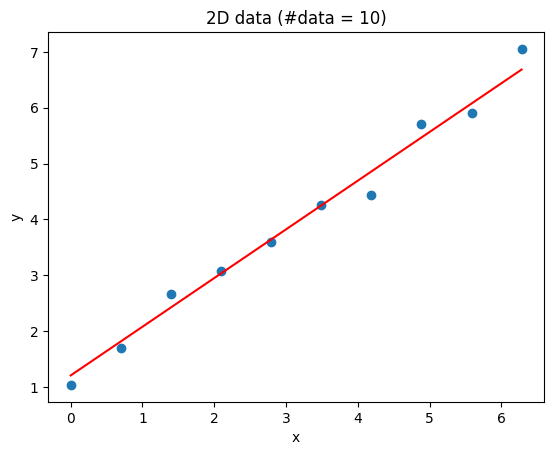

In [49]:
plt.figure()
plt.plot(x, y, 'o')
plt.plot(x_for_plotting, y_for_plotting.data.numpy(), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

## IV. Exercises

### 1. Classification

#### Load iris dataset from scikit-learn

In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()

#### Classify using kNN with different k and simple neural network as described in Classification section

In [52]:
from sklearn.model_selection import train_test_split
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np

neighbors = np.arange(1, 9)

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print("Accuracy: {0} with k = {1}".format(knn.score(X_test, y_test), knn.n_neighbors))

Accuracy: 0.9666666666666667 with k = 1
Accuracy: 0.9333333333333333 with k = 2
Accuracy: 1.0 with k = 3
Accuracy: 1.0 with k = 4
Accuracy: 1.0 with k = 5
Accuracy: 0.9666666666666667 with k = 6
Accuracy: 0.9666666666666667 with k = 7
Accuracy: 0.9666666666666667 with k = 8


In [61]:
!pip install tensorflow

In [68]:
!pip install numpy --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 728.1 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [70]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.utils.vis_utils import plot_model

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [58]:
# Define the neural network architecture
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, pd.get_dummies(y), epochs=50, batch_size=10)

# Draw the neural network architecture
plot_model(model, to_file='neural_network.png', show_shapes=True, show_layer_names=True)

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

#### Compare the accuracy of the classifier in the plot

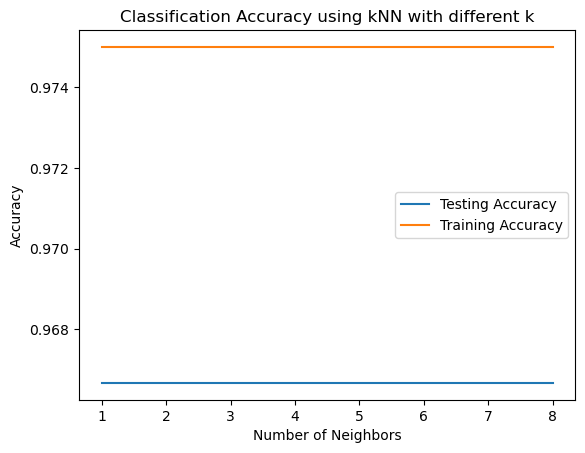

In [55]:
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('Classification Accuracy using kNN with different k')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Classify using deep learning with CNN

### 2. Recommendation Systems

In [71]:
import pandas as pd

movies_df = pd.read_csv('movies.csv')
users_df = pd.read_csv('users.csv')
ratings_df = pd.read_csv('ratings.csv')

In [72]:
movies_df

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
95,96,In the Bleak Midwinter (1995),Comedy
96,97,Hate (Haine,NaN
97,98,Shopping (1994),Action|Thriller
98,99,Heidi Fleiss: Hollywood Madam (1995),Documentary


#### a. Content-Based Recommendation Model

##### Find list of used genres which is used to category the movies

##### Vectorize the relationship between movies and genres and put them into Ij

##### Vectorize the relationship between users and genres and put them into Uj (if user rate for a movie, he/she has the related history with the movies’genres).

##### Compute the cosine_similarity between movies and users. Hint: you can use sklearn.metrics.pairwise and cosine_similarity for quick calculation.

#### b. Collaborative Filtering Recommendation Model by Users

##### Use train_test_split to split above dataset with the ratio 50/50. The test dataset will be used as groundtruth to evaluate the rating calculated by using the train dataset
❖ Create matrix for users, movies and ratings in both training and testing datasets. Hint: train_data_matrix = train_data.pivot_table(index='user_id', columns='movie_id',
values='rating').astype('float64')
test_data_matrix = test_data.pivot_table(index='user_id', columns='movie_id', values='rating').astype('float64')
❖ Calculate the user correlation. Hint: you can reference help_function.txt for some necessary functions, but you can write the function by yourself. The similarity between item and itself should be 0 to not affect the result.
❖ Implement a predict based on user correlation coefficient.
❖ Predict on train dataset and compare the RMSE with the test dataset.
c. Collaborative Filtering Recommendation Model by Items.
❖ Calculate the item correlation
❖ Implement function to predict ratings based on Item Similarity.
❖ Predict on train dataset and compare the RMSE with the test dataset.
❖ Compare the results between User-based and Item-based. Make conclusion.